In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [36]:
x,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

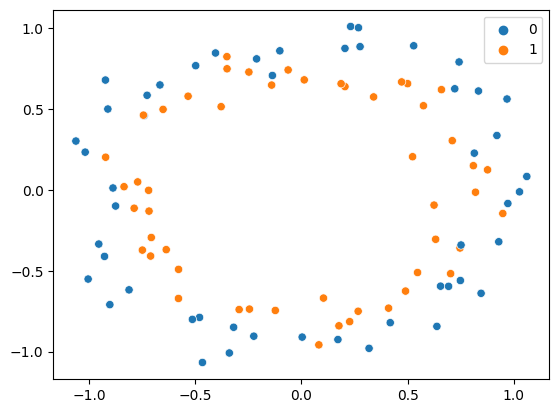

In [37]:
## Data Visualiszaiton

sns.scatterplot(x=x[:,0],y=x[:,1], hue=y)

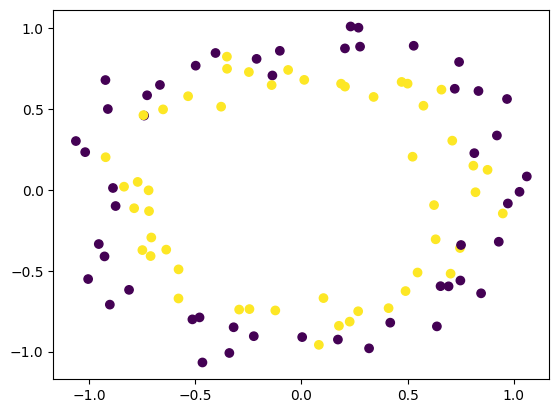

In [38]:
## Visualization using Matplotlit Scatter function (For my own understanding)

plt.scatter(x[:,0],x[:,1],c=y)

In [39]:
## Spliting the data

x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=1)

In [40]:
## Building the Model

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               768       
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
## Compiling the Model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=3500,validation_data=(x_test,y_test))

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 22ms/step - loss: 0.2477 - accuracy: 0.9125 - val_loss: 0.3539 - val_accuracy: 0.8500
Epoch 1002/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.2474 - accuracy: 0.9125 - val_loss: 0.3463 - val_accuracy: 0.8500
Epoch 1003/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.2484 - accuracy: 0.9125 - val_loss: 0.3409 - val_accuracy: 0.8500
Epoch 1004/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.2494 - accuracy: 0.9125 - val_loss: 0.3381 - val_accuracy: 0.8500
Epoch 1005/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.2492 - accuracy: 0.9125 - val_loss: 0.3430 - val_accuracy: 0.8500
Epoch 1006/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.2485 - accuracy: 0.9125 - val_loss: 0.3498 - val_accuracy: 0.8500
Epoch 1007/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.2487 - accuracy: 0.9125

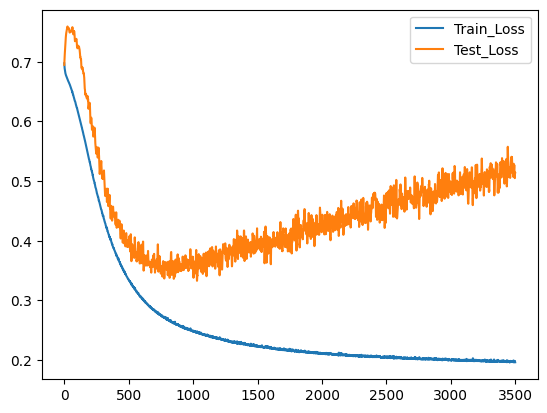

In [43]:
## Ploting the loss

plt.plot(history.history['loss'], label= 'Train_Loss')
plt.plot(history.history['val_loss'], label= 'Test_Loss')
plt.legend()
plt.show()

In [67]:
## If we observe after probabily 500 Epocs, that val_loss start increasing that means Overfitting

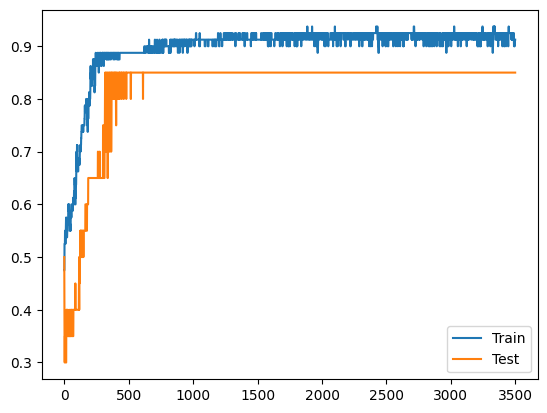

In [44]:
## Plotting the Accuracy

plt.plot(history.history['accuracy'], label= 'Train')
plt.plot(history.history['val_accuracy'], label= 'Test')
plt.legend()
plt.show()

In [ ]:
## Upon Observing , we see after 500 Epochs the val_accuracy becomes constant and no change hence model become overfit.

In [45]:
## Now if we observ both the curves after a approx 500 epoch value both loss and accuracy tend to become uniform so this is case of
## Overfitting and we will use early stopping to stop the training before the model move towards over fitting

9600/9600 [==============================] - 14s 1ms/step


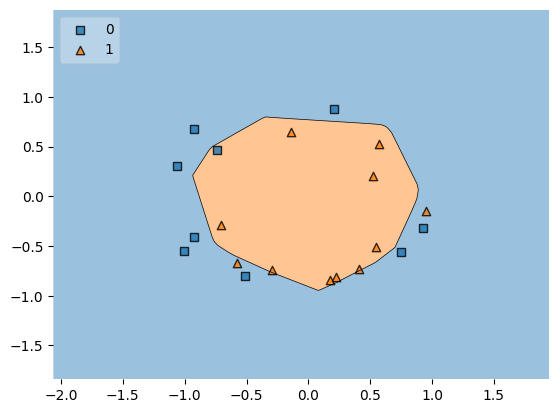

In [46]:
## Ploting the decision boundary

plot_decision_regions(x_test,y_test, clf = model, legend =2 )
plt.show()

# Building DNN using Early Stopping

In [52]:
## To implement the early stopping keras library has features know as callbacks from there we import earlystopping

model = Sequential()
model.add(Dense(256,activation= 'relu', input_dim=2 ))
model.add(Dense(1, activation = 'sigmoid'))

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               768       
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1025 (4.00 KB)
Trainable params: 1025 (4.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])

In [61]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose=1,
    mode="auto",
    baseline= None,
    restore_best_weights =False
)

In [62]:
history = model.fit(x_train, y_train , epochs=3500 , validation_data = (x_test,y_test), callbacks = callback)

Epoch 1/3500
3/3 [==============================] - 0s 52ms/step - loss: 0.6738 - accuracy: 0.5750 - val_loss: 0.7610 - val_accuracy: 0.3000
Epoch 2/3500
3/3 [==============================] - 0s 27ms/step - loss: 0.6731 - accuracy: 0.5750 - val_loss: 0.7610 - val_accuracy: 0.3000
Epoch 3/3500
3/3 [==============================] - 0s 23ms/step - loss: 0.6726 - accuracy: 0.5875 - val_loss: 0.7608 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 21ms/step - loss: 0.6723 - accuracy: 0.5875 - val_loss: 0.7616 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6716 - accuracy: 0.5875 - val_loss: 0.7630 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6712 - accuracy: 0.5750 - val_loss: 0.7641 - val_accuracy: 0.3500
Epoch 7/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.6707 - accuracy: 0.5750 - val_loss: 0.7652 - val_accuracy: 0.3500
Epoch 8/3500


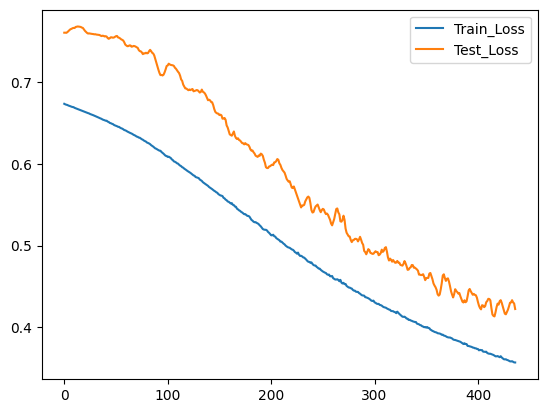

In [63]:
## Ploting the loss

plt.plot(history.history['loss'], label= 'Train_Loss')
plt.plot(history.history['val_loss'], label= 'Test_Loss')
plt.legend()
plt.show()

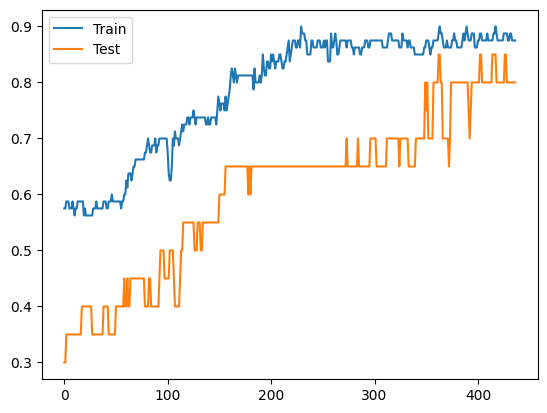

In [64]:
## Plotting the Accuracy

plt.plot(history.history['accuracy'], label= 'Train')
plt.plot(history.history['val_accuracy'], label= 'Test')
plt.legend()
plt.show()

In [65]:
## So Using Early Stoppping out traiing Stops at 437 Epoch, so this is beauty of Early stopping which prevents overfitting by
## stopping the training early

# Early Stopping Hyperparameters Explaination

In [66]:
##
# callback = EarlyStopping(
#     monitor = 'val_loss',
#     min_delta = 0.00001,
#     patience = 20,
#     verbose=1,
#     mode="auto",
#     baseline= None,
#     restore_best_weights =False
# )


# 1. monitor = This implies the parameter which we want to monitor, Generally we prefer validation loss, as it starts increasing we
# stop the traiing, we can choose 'accuracy' also in that case if it starts decreasing early stopping will apply

# 2. min_delta = This parameters implies minimum change in the quantity which we are monitoring to qualify for improvement.That means
# let say for epoch1 , val_loss = 0.4589 so we are specifying min_delta as 0.0001 that mean if in next epoch the value is reduce to
# 0.4588 then this will be consider as an improvement

# 3. patience = This parameters implies the no. of epochs with no improvement after which training will be stop that means lets say
# we give patience value as 20 then keras will monitor each epoch value for monitor parameter('val_loss') if there is no improvemnt
# for next 20 epochs it will stop the training

# 4. Verbose = This parameter is used to show the result, value 1 /True will show the termination message like in our case we saw
# termination message as 'Epoch 437: early stopping' , value 0 / False will not show this message

# 5. mode = This parameter has 3 values ['auto', 'min' , 'max'], which specify at which value of monitor parameter training should
# stop, In min, the training stops when the value of monitor parameter start decreasing (eg.val_accuracy)and In Max, the training
# will stop when the value of monitoring quanity starts increasing (eg. val_loss), In 'auto' keras itself decide which mode to choose
# Generally people keep it on 'auto' coz keras is intellgent enough to decide

# 6. baeline = This parameter is the value of the monitoring quantity which we give explictly and the training will stop if the model
# doesn't show improvement over the baseline.
# Generally it require high domain knowledge and we keep it None however depends upon the requirement we can give the value

# 7. restore_best_weights = This parameter gives us the option whether to restore weights from the last epoch with the best value of
# monitered quantity. If False , model weights obtained at the last step of the training are used.
# So basically once the training is done, we can either use the weights from the last epoch or the weights from the epoch where our
# monitered quanity gives best result. Again depends on the requirement we can set it to true. In our case we set it to false.
